In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [191]:
def sep( n: int = 140, sep: str = "="):
    print(sep*n)

def new_section(string: str, n: int = 140, sep: str = "="):
    m = len(string)
    if n < m:
        n = m + 6
    padding = (n-m+1)//2
    print(sep*padding + " " + string + " " + sep*padding)


In [192]:
coffee_quality = pd.read_csv("Dataset/merged_data_cleaned_var.csv")


In [193]:
new_section("Coffee Merged Quality Data")
coffee_quality["Moisture"] = coffee_quality["Moisture"]*100
print(coffee_quality.head())
sep()

========================================================= Coffee Merged Quality Data =========================================================
   Species Variety Processing.Method  Total.Cup.Points  Moisture
0  Arabica   Other      Washed / Wet             89.92      12.0
1  Arabica   Other      Washed / Wet             88.83      12.0
2  Arabica   Other      Washed / Wet             88.75      11.0
3  Arabica   Other     Natural / Dry             88.25      10.0
4  Arabica   Other      Washed / Wet             87.92       0.0


In [194]:
df = pd.read_csv("Dataset/merged_data_cleaned.csv")

In [195]:
new_section("Coffee Quality Data Columns",70)
print("Número de colunas: ", coffee_quality.shape[0])
print("Número de linhas: ", coffee_quality.shape[1])
print(coffee_quality.columns)
sep()

====================== Coffee Quality Data Columns ======================
Número de colunas:  1089
Número de linhas:  5
Index(['Species', 'Variety', 'Processing.Method', 'Total.Cup.Points',
       'Moisture'],
      dtype='object')


========================================= Gráfico de Barras para Mostrar a Frequência de Cada Species =========================================


C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\2371565039.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=specie_counts.index, y=specie_counts.values, palette="crest")


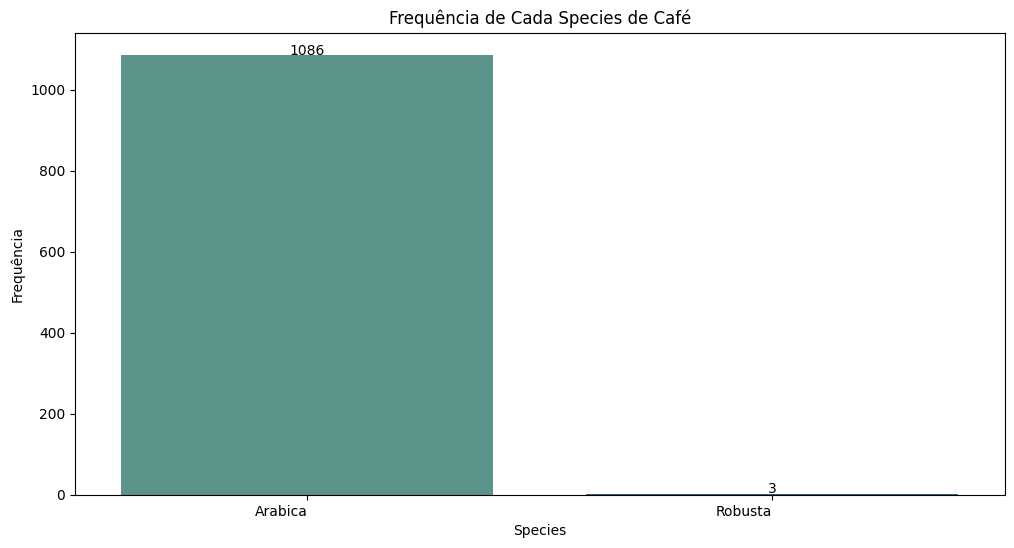

In [196]:
# Calcular a frequência de cada espécie de café
specie_counts = coffee_quality["Species"].value_counts()
new_section("Gráfico de Barras para Mostrar a Frequência de Cada Species")
# Criar um gráfico de barras para mostrar a frequência de cada specie
plt.figure(figsize=(12, 6))
sns.barplot(x=specie_counts.index, y=specie_counts.values, palette="crest")
for index, value in enumerate(specie_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center')
plt.title("Frequência de Cada Species de Café")
plt.xlabel("Species")
plt.ylabel("Frequência")
plt.xticks(rotation=0, ha="right")
plt.show()
sep()

In [197]:
new_section("Coffee Quality Data Total.Cup.Points and Description",3)
balance_stats = coffee_quality["Total.Cup.Points"].describe()
# Salvar o valor mínimo, os três quartis e o valor máximo
min_val = balance_stats["min"]
q1 = balance_stats["25%"]
median = balance_stats["50%"]
q3 = balance_stats["75%"]
max_val = balance_stats["max"]
print(balance_stats)
sep()

=== Coffee Quality Data Total.Cup.Points and Description ===
count    1089.000000
mean       82.061699
std         2.631841
min        59.830000
25%        81.080000
50%        82.420000
75%        83.500000
max        89.920000
Name: Total.Cup.Points, dtype: float64


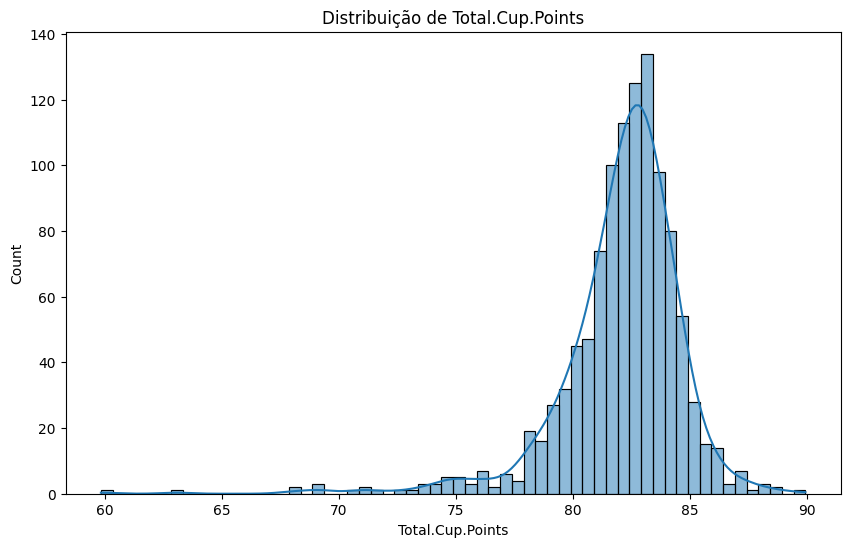

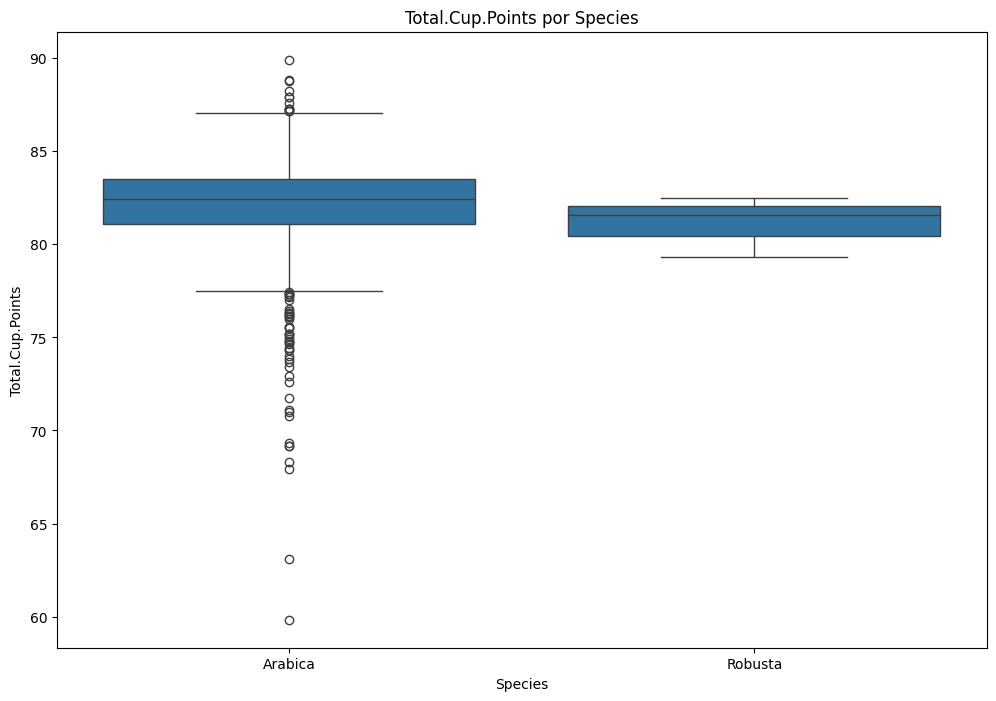

In [198]:
# Histograma de Total.Cup.Points
plt.figure(figsize=(10, 6))
sns.histplot(coffee_quality["Total.Cup.Points"], bins=60, kde=True)
plt.title("Distribuição de Total.Cup.Points")
plt.show()

# Boxplots para Total.Cup.Points por Species
plt.figure(figsize=(12, 8))
sns.boxplot(x="Species", y="Total.Cup.Points", data=coffee_quality)
plt.title("Total.Cup.Points por Species")
plt.show()

============================================== Gráfico de Densidade do Total.Cup.Points (Merged) ==============================================


C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\1600067292.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(coffee_quality["Total.Cup.Points"], shade=True)


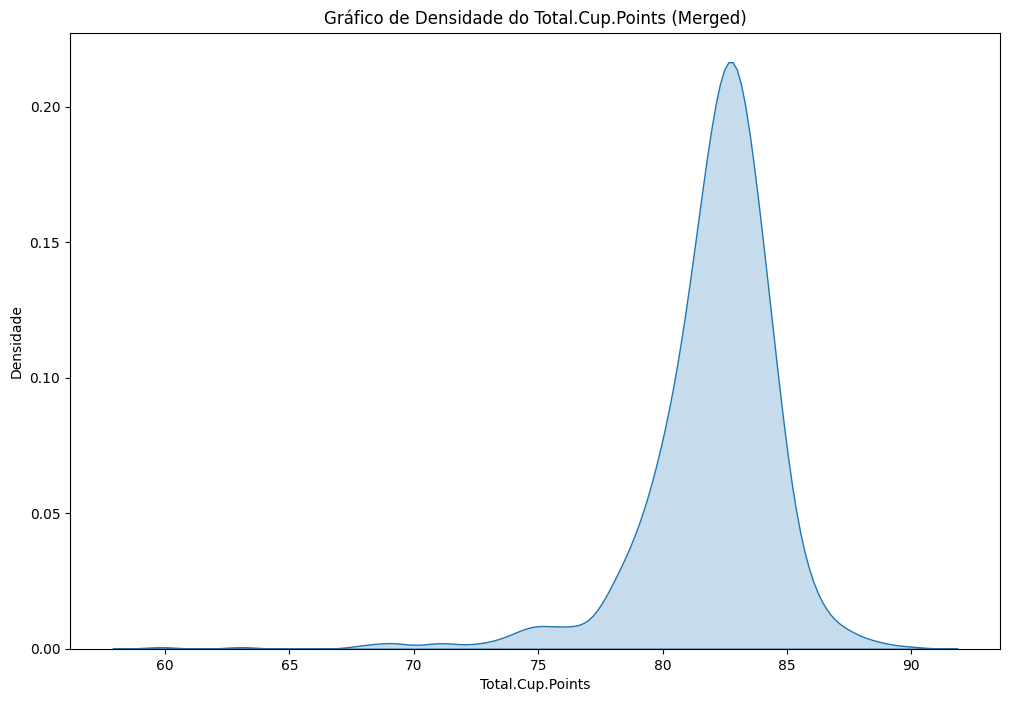

In [199]:
new_section("Gráfico de Densidade do Total.Cup.Points (Merged)")
plt.figure(figsize=(12, 8))  
sns.kdeplot(coffee_quality["Total.Cup.Points"], shade=True)  
plt.xlabel("Total.Cup.Points") 
plt.ylabel("Densidade") 
plt.title("Gráfico de Densidade do Total.Cup.Points (Merged)")  
plt.show()
sep()

======================================== Gráfico de Densidade do Total.Cup.Points por Variety (Merged) ========================================


C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\1514467771.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Total.Cup.Points"], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\1514467771.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Total.Cup.Points"], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\1514467771.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Total.Cup.Points"], label=variety, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\1514467771.py:5: FutureWarning: 

`shade` is now deprecated in favor of `f

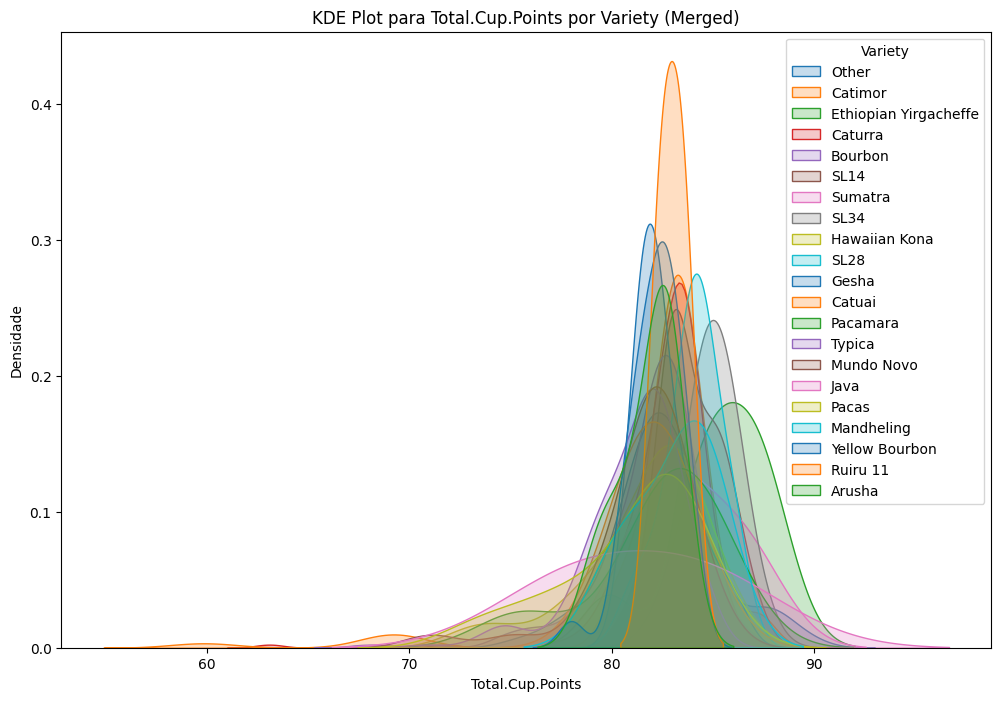

In [200]:
new_section("Gráfico de Densidade do Total.Cup.Points por Variety (Merged)")
plt.figure(figsize=(12, 8))
for variety in coffee_quality["Variety"].unique():
    subset = coffee_quality[coffee_quality["Variety"] == variety]
    sns.kdeplot(subset["Total.Cup.Points"], label=variety, shade=True)
plt.xlabel("Total.Cup.Points")
plt.ylabel("Densidade")
plt.title("KDE Plot para Total.Cup.Points por Variety (Merged)")
plt.legend(title="Variety")
plt.show()
sep()


============================================ Gráfico de Densidade do Total.Cup.Points por Variety ============================================


C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\2111871087.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Total.Cup.Points"], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\2111871087.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Total.Cup.Points"], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\2111871087.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Total.Cup.Points"], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\2111871087.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`;

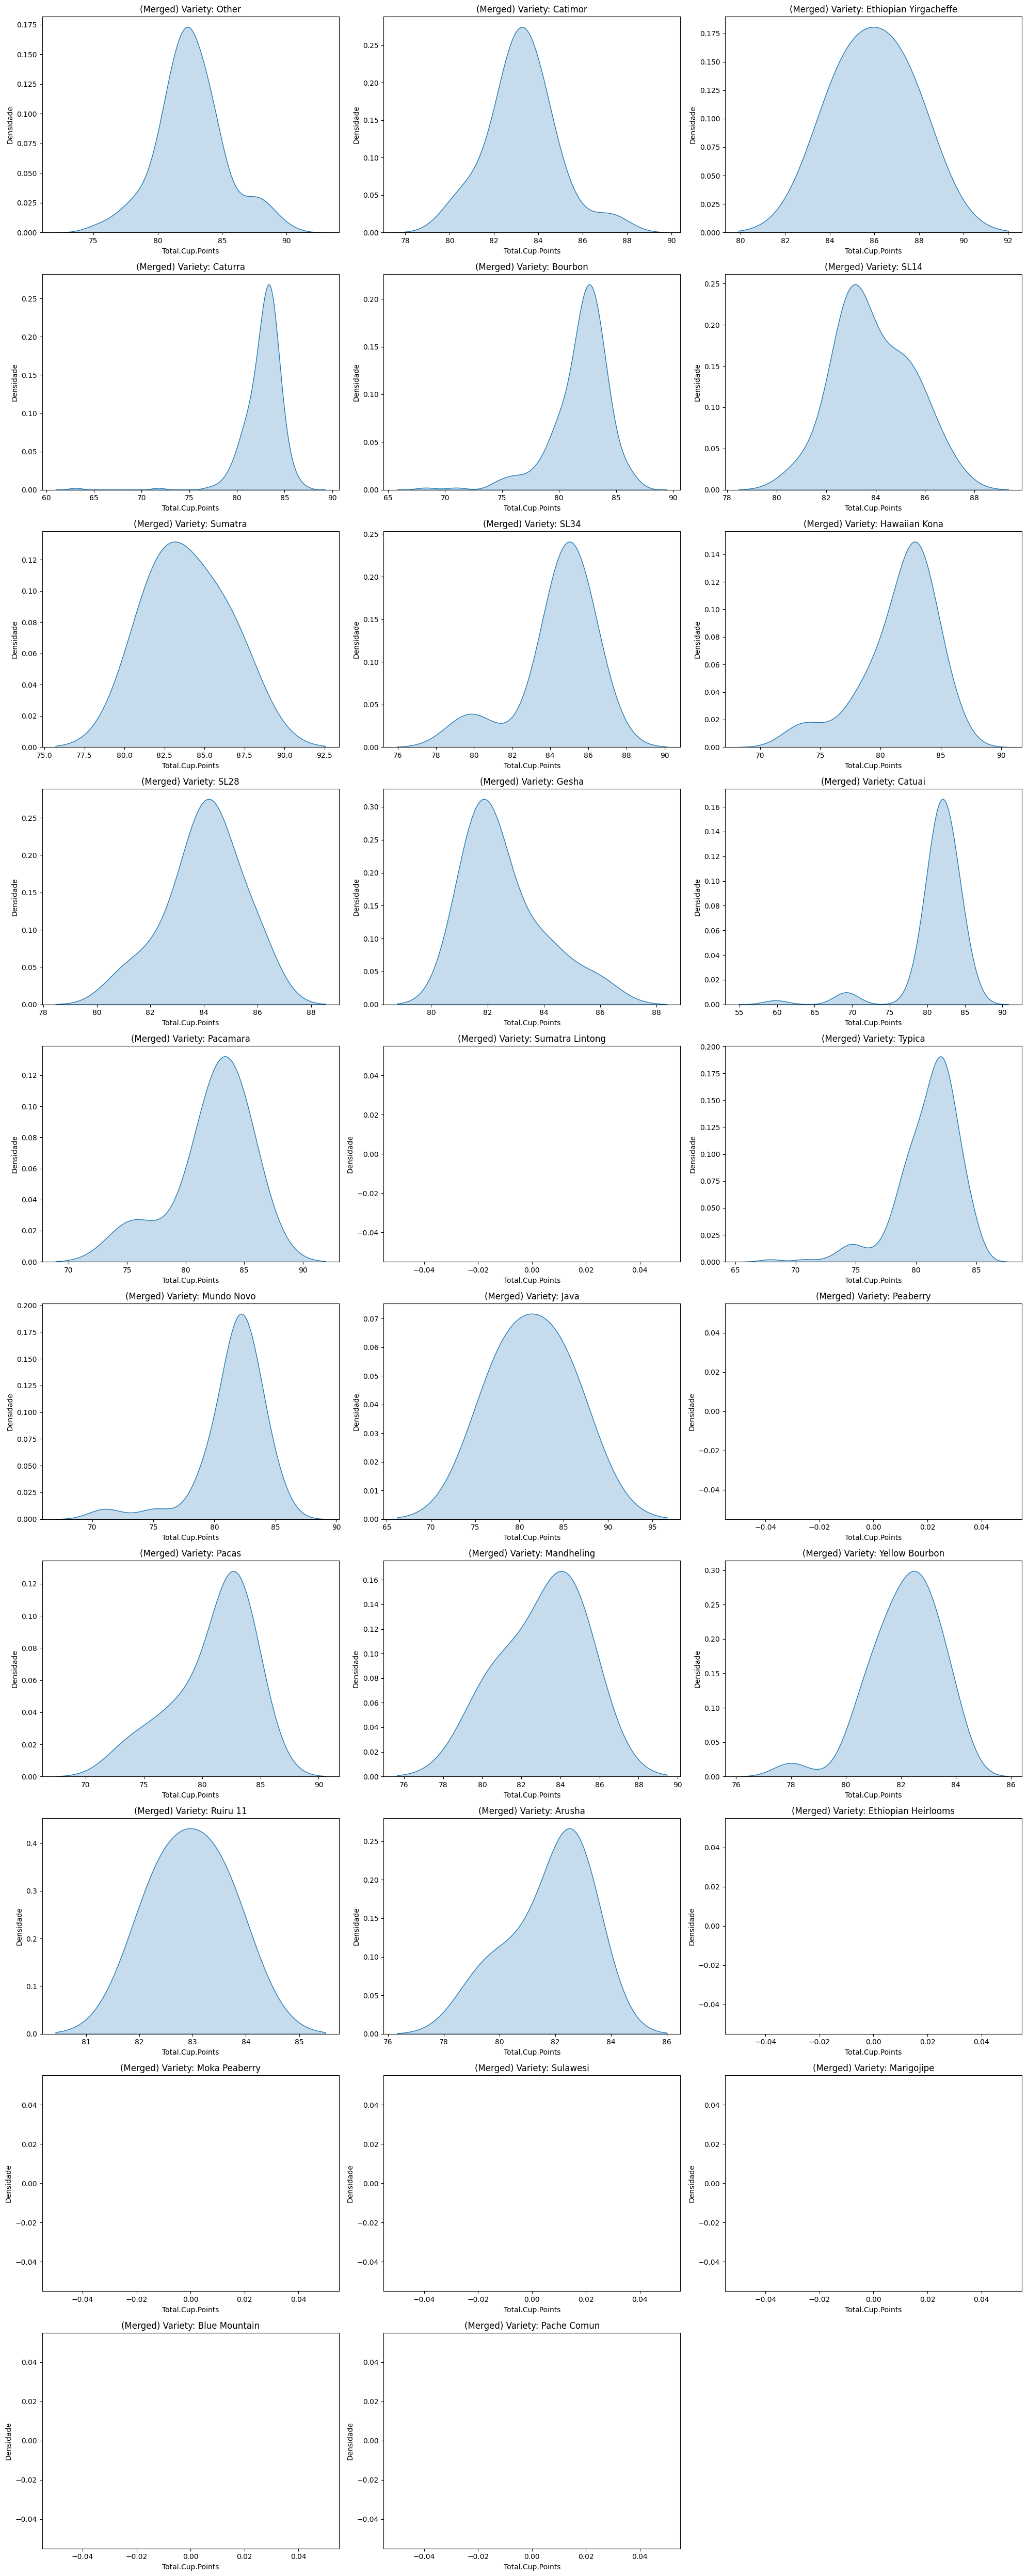

In [201]:
new_section("Gráfico de Densidade do Total.Cup.Points por Variety")
variety_list = coffee_quality["Variety"].unique()
num_varieties = len(variety_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_varieties + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, variety in enumerate(variety_list):
    subset = coffee_quality[coffee_quality["Variety"] == variety]
    sns.kdeplot(subset["Total.Cup.Points"], shade=True, ax=axes[i])
    axes[i].set_title(f"(Merged) Variety: {variety}")
    axes[i].set_xlabel("Total.Cup.Points")
    axes[i].set_ylabel("Densidade")

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
sep()

================================================ Frequência de Cada Variedade de Café (Merged) ================================================
Quantidade de Variedades:  29
Variety
Caturra                  249
Bourbon                  223
Typica                   208
Other                    110
Catuai                    74
Hawaiian Kona             44
Yellow Bourbon            32
Mundo Novo                31
Catimor                   20
SL14                      17
SL28                      15
Pacas                     13
Gesha                     12
SL34                       8
Pacamara                   7
Arusha                     6
Sumatra                    3
Mandheling                 3
Ethiopian Yirgacheffe      2
Ruiru 11                   2
Java                       2
Peaberry                   1
Sumatra Lintong            1
Ethiopian Heirlooms        1
Moka Peaberry              1
Sulawesi                   1
Marigojipe                 1
Blue Mountain              1
Pache 

C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\812946004.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variety_counts.index, y=variety_counts.values, palette="viridis")


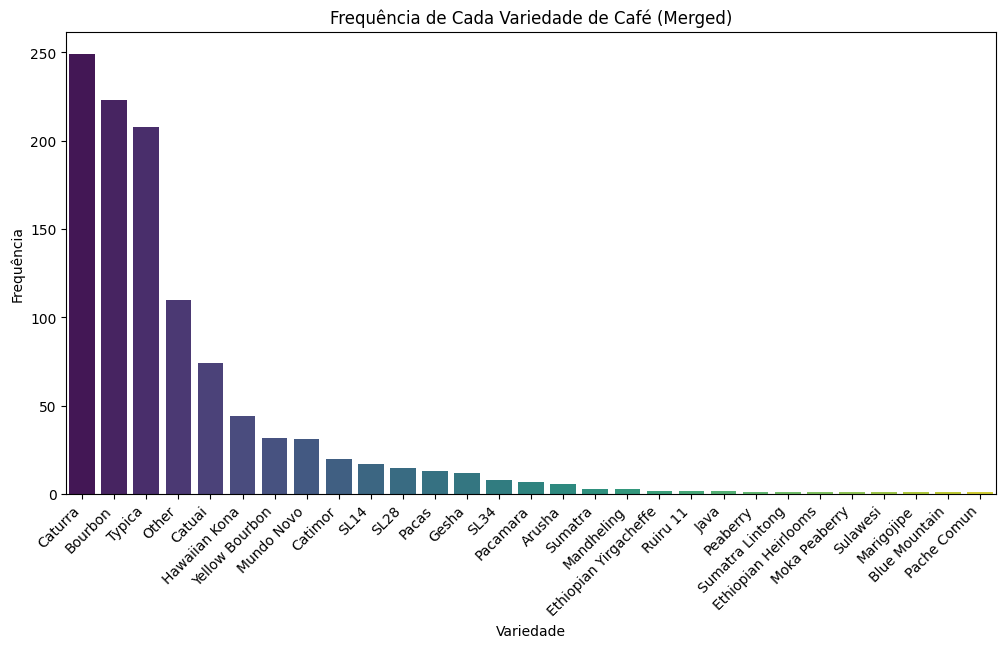

In [202]:
# Calcular a frequência de cada variedade
variety_counts = coffee_quality["Variety"].value_counts()
new_section("Frequência de Cada Variedade de Café (Merged)")
print("Quantidade de Variedades: ", len(variety_counts))
print(variety_counts)
sep()
new_section("Gráfico de Barras para Mostrar a Frequência de Cada Variedade")
# Criar um gráfico de barras para mostrar a frequência de cada variedade
plt.figure(figsize=(12, 6))
sns.barplot(x=variety_counts.index, y=variety_counts.values, palette="viridis")
plt.title("Frequência de Cada Variedade de Café (Merged)")
plt.xlabel("Variedade")
plt.ylabel("Frequência")
plt.xticks(rotation=45, ha="right")
plt.show()
sep()

In [203]:
coffee_quality["Processing.Method"].unique()

array(['Washed / Wet', 'Natural / Dry', 'Pulped natural / honey',
       'Semi-washed / Semi-pulped', 'Other'], dtype=object)

======================================= Gráfico de Densidade do Total.Cup.Points por Processing.Method  =======================================


C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\618553973.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Total.Cup.Points"], label=Processing_Method, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\618553973.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Total.Cup.Points"], label=Processing_Method, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\618553973.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Total.Cup.Points"], label=Processing_Method, shade=True)
C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\618553973.py:5: FutureWarning: 

`shade` is now

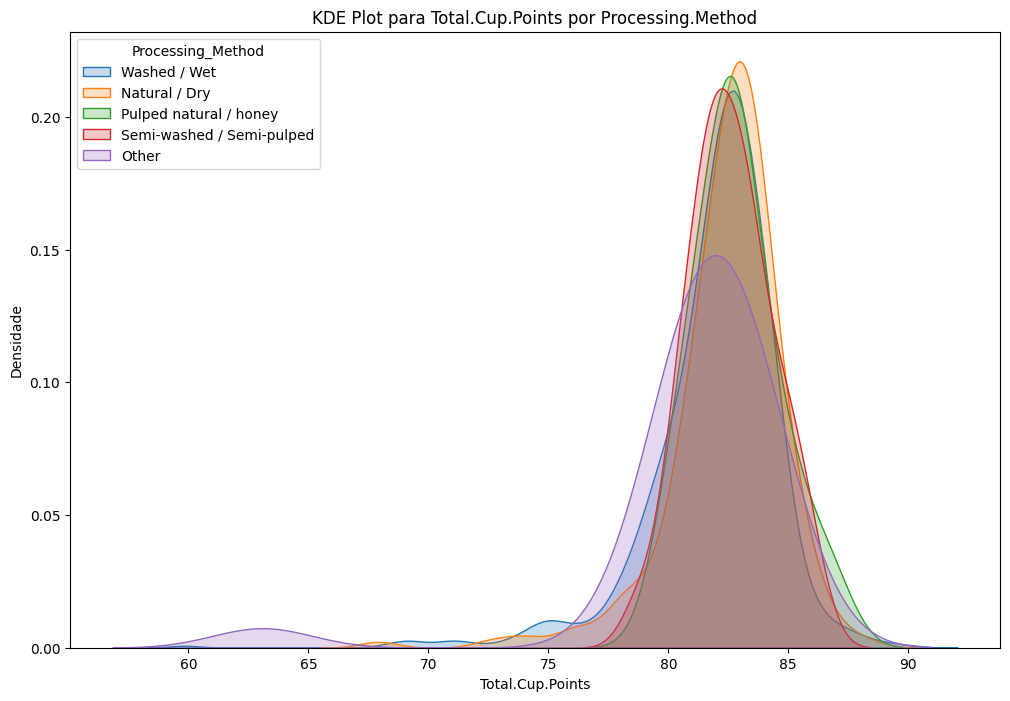

In [204]:
new_section("Gráfico de Densidade do Total.Cup.Points por Processing.Method ")
plt.figure(figsize=(12, 8))
for Processing_Method in coffee_quality["Processing.Method"].unique():
    subset = coffee_quality[coffee_quality["Processing.Method"] == Processing_Method]
    sns.kdeplot(subset["Total.Cup.Points"], label=Processing_Method, shade=True)
plt.xlabel("Total.Cup.Points")
plt.ylabel("Densidade")
plt.title("KDE Plot para Total.Cup.Points por Processing.Method")
plt.legend(title="Processing_Method")
plt.show()
sep()

=========================================== Frequência de Cada método de processo de Café (Merged) ===========================================
Processing.Method
Washed / Wet                 768
Natural / Dry                227
Semi-washed / Semi-pulped     55
Other                         26
Pulped natural / honey        13
Name: count, dtype: int64


C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\462586013.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Processing_Method_counts.index, y=Processing_Method_counts.values, palette="viridis")


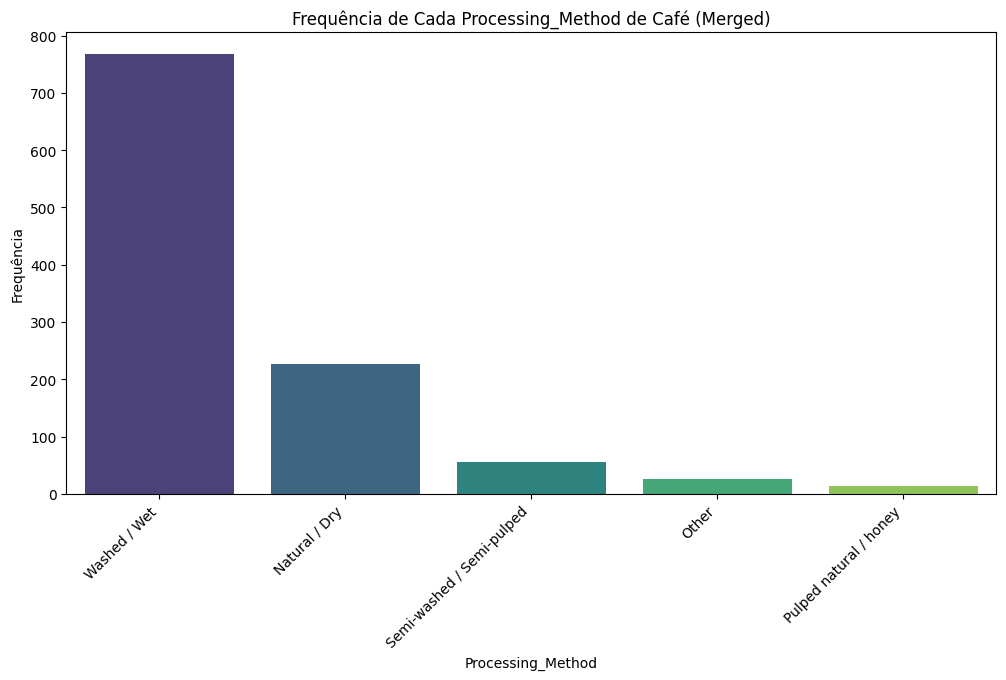

In [205]:
# Calcular a frequência de cada variedade
Processing_Method_counts = coffee_quality["Processing.Method"].value_counts()
new_section("Frequência de Cada método de processo de Café (Merged)")
print(Processing_Method_counts)
sep()

# Criar um gráfico de barras para mostrar a frequência de cada variedade
plt.figure(figsize=(12, 6))
sns.barplot(x=Processing_Method_counts.index, y=Processing_Method_counts.values, palette="viridis")
plt.title("Frequência de Cada Processing_Method de Café (Merged)")
plt.xlabel("Processing_Method")
plt.ylabel("Frequência")
plt.xticks(rotation=45, ha="right")
plt.show()

============================================ Coffee Quality Data Moisture and Description (Merged) ============================================
                  Total.Cup.Points  Moisture
Total.Cup.Points          1.000000 -0.144141
Moisture                 -0.144141  1.000000


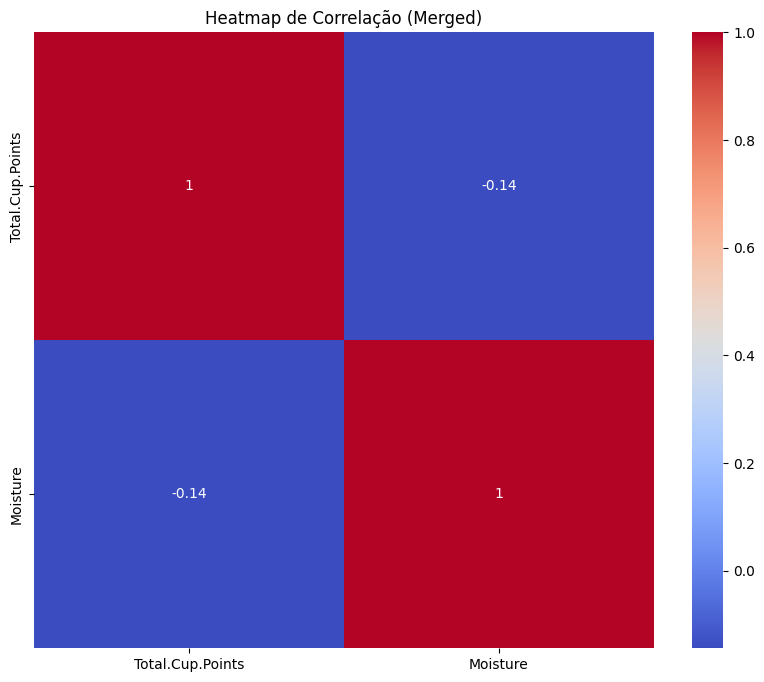

In [206]:
new_section("Coffee Quality Data Moisture and Description (Merged)")
correlation = coffee_quality[["Total.Cup.Points", "Moisture"]].corr()
print(correlation)

# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(coffee_quality[["Total.Cup.Points", "Moisture"]].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap de Correlação (Merged)")
plt.show()
sep()

======================================================== Boxplot de Moisture (Merged) ========================================================


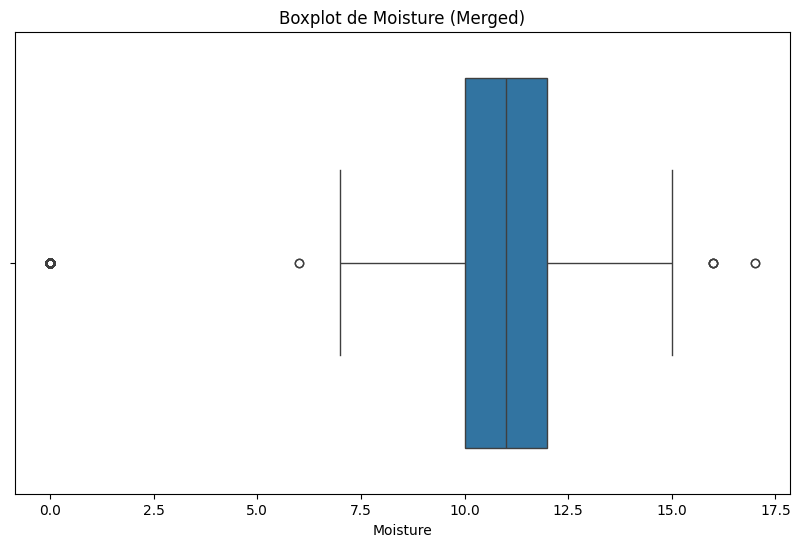

In [207]:
new_section("Boxplot de Moisture (Merged)")
# Criar um boxplot para Moisture
plt.figure(figsize=(10, 6))
sns.boxplot(x=coffee_quality["Moisture"])
plt.title("Boxplot de Moisture (Merged)")
plt.xlabel("Moisture")
plt.show()
sep()

In [208]:
min_val = balance_stats["min"]
q1 = balance_stats["25%"]
median = balance_stats["50%"]
q3 = balance_stats["75%"]
max_val = balance_stats["max"]

================================================= Gráfico de Densidade para Moisture (Merged) =================================================


C:\Users\Isas_\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Isas_\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Isas_\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Isas_\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`

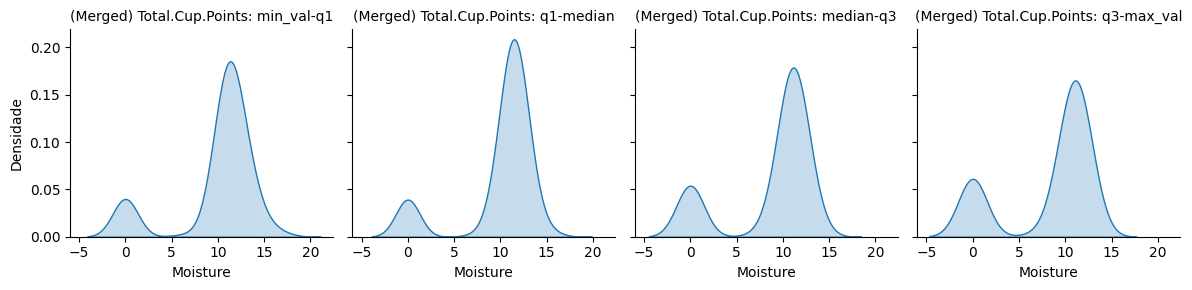

In [209]:
new_section("Gráfico de Densidade para Moisture (Merged)")
# Definir faixas de Total.Cup.Points
coffee_quality["Total.Cup.Points.Range"] = pd.cut(coffee_quality["Total.Cup.Points"], bins=[min_val, q1, median, q3,max_val],labels=["min_val-q1", "q1-median", "median-q3","q3-max_val",])
                                                 
# Criar um FacetGrid
g = sns.FacetGrid(coffee_quality, col="Total.Cup.Points.Range", col_wrap=4)
g.map(sns.kdeplot, "Moisture", shade=True)

# Ajustar os títulos e labels
g.set_axis_labels("Moisture", "Densidade")
g.set_titles(col_template="(Merged) Total.Cup.Points: {col_name}")

plt.show()
sep()

================================================= Gráfico de Densidade para Moisture (Merged) =================================================


C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\1729937923.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(coffee_quality["Moisture"], shade=True)


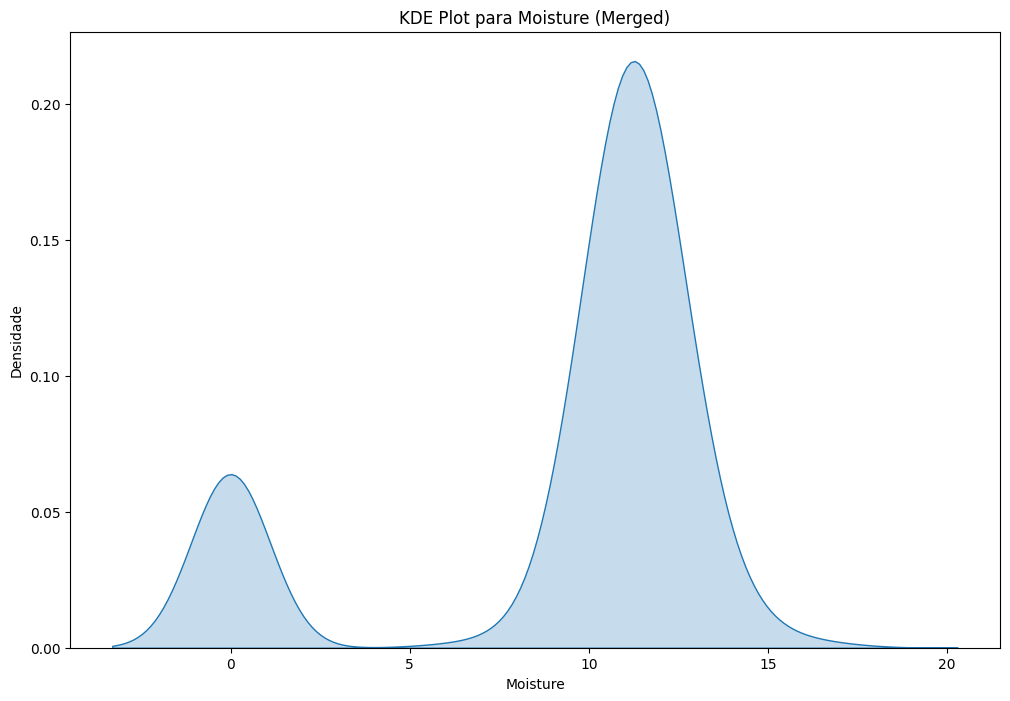

In [210]:
new_section("Gráfico de Densidade para Moisture (Merged)")
plt.figure(figsize=(12, 8))
sns.kdeplot(coffee_quality["Moisture"], shade=True)
plt.xlabel("Moisture")
plt.ylabel("Densidade")
plt.title("KDE Plot para Moisture (Merged)")
plt.show()
sep()


=================================== Gráfico de Densidade do Total.Cup.Points por Processing.Method (Merged) ===================================


C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\2203572950.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Total.Cup.Points"], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\2203572950.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Total.Cup.Points"], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\2203572950.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset["Total.Cup.Points"], shade=True, ax=axes[i])
C:\Users\Isas_\AppData\Local\Temp\ipykernel_12412\2203572950.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`;

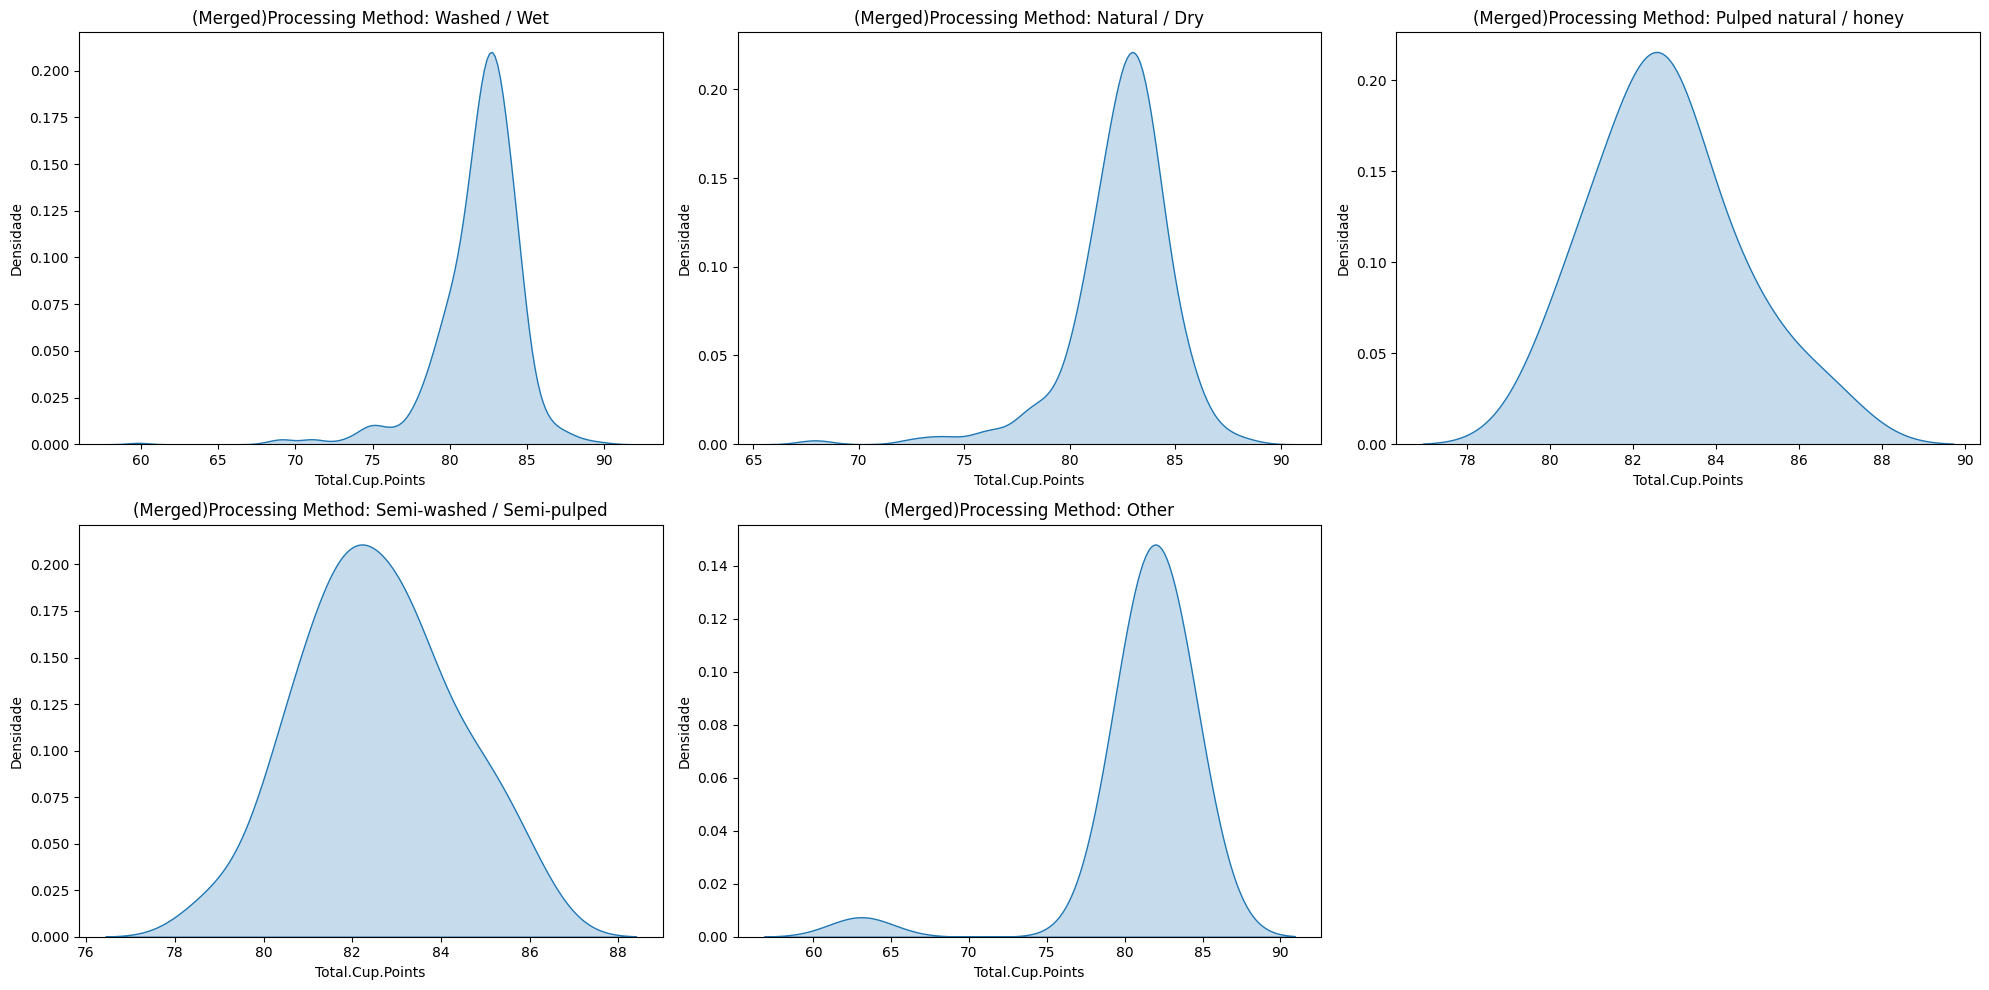

In [211]:
new_section("Gráfico de Densidade do Total.Cup.Points por Processing.Method (Merged)")
method_list = coffee_quality["Processing.Method"].unique()
num_methods = len(method_list)

# Definir o número de colunas para os subplots
num_cols = 3
num_rows = (num_methods + num_cols - 1) // num_cols  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, method in enumerate(method_list):
    subset = coffee_quality[coffee_quality["Processing.Method"] == method]
    sns.kdeplot(subset["Total.Cup.Points"], shade=True, ax=axes[i])
    axes[i].set_title(f"(Merged)Processing Method: {method}")
    axes[i].set_xlabel("Total.Cup.Points")
    axes[i].set_ylabel("Densidade")

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
sep()